In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

In [2]:
from PIL import Image

In [3]:
def get_grayscale(image ,r_multipler = 0.299 , g_multiplier = 0.587, b_multiplier = 0.114):
    gray_scale_image = copy.deepcopy(image)
    gray_scale_image = gray_scale_image.astype(np.float32)
    gray_scale_image[:,:,0] *= r_multipler
    gray_scale_image[:,:,1] *= g_multiplier
    gray_scale_image[:,:,2] *= b_multiplier
    
    return np.sum(gray_scale_image, axis =2)
    

In [4]:
def save_image(np_array_img, image_name):
    if np.max(np_array_img)<= 1:
        np_array_img = (np_array_img * 255).astype(np.uint8)
    img = Image.fromarray(np_array_img)

    img = img.convert('RGB')

    img.save(image_name)

    print(f'Image saved as {image_name}')

In [5]:
def load_image_as_np_array(image_name):
    img = Image.open(image_name)
    return np.array(img)

In [6]:
img = load_image_as_np_array('/Users/Kunal/Downloads/dog_sample.jpg')

Image saved as dog_sample_gray.jpg


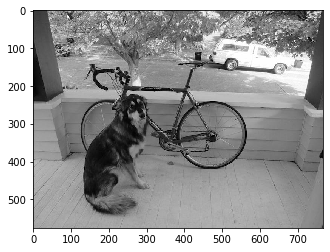

In [7]:
gray_img1 = get_grayscale(img)
save_image(gray_img1,'dog_sample_gray.jpg')
gray_img = load_image_as_np_array('dog_sample_gray.jpg')
plt.imshow(gray_img)

In [8]:
def shift_img(img, channel, shifting_factor):
    '''image expects to have 3 channels'''
    
    img_copy = copy.deepcopy(img)

    img_copy[:,:,channel]  += shifting_factor

    img_copy = np.where(img_copy>1 , 1, img_copy)
    img_copy = np.where(img_copy<0 , 0, img_copy)
    return img_copy

In [9]:
normalized_img = img / 255.

In [10]:
shifted_img = shift_img(normalized_img, 0,0.4)
shifted_img = shift_img(shifted_img, 1,0.4)
shifted_img = shift_img(shifted_img, 2,0.4)

In [11]:
def imshow(img):
    img = (img*255).astype(np.uint8)
    plt.imshow(img)

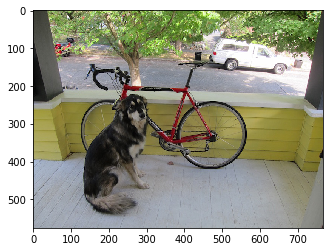

In [12]:
imshow(normalized_img)

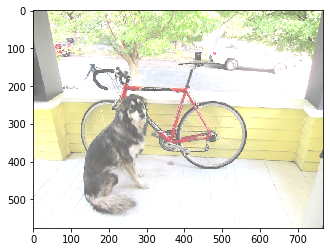

In [13]:
imshow(shifted_img)

In [14]:
def show_pixel_stats(img):
    print(f'max = {np.max(img)}\n min = {np.min(img)}\n avg = {np.mean(img)}')

In [15]:
def convert_into_convertible(shifted_image):
    shifted_image *= 255.
    shifted_image = shifted_image.astype(np.uint8)
    return shifted_image

In [16]:
save_image(shifted_img, 'clamped.jpg')

Image saved as clamped.jpg


In [17]:
shifted_img = load_image_as_np_array('clamped.jpg')

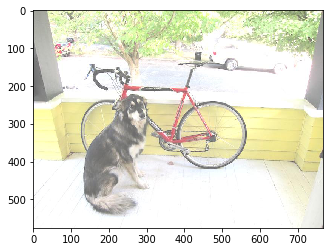

In [18]:
plt.imshow(shifted_img)

In [19]:
def get_hue(img_info):
    
    r,g,b,c,argv = img_info
    if c == 0:
        return 0
    
    if argv == 0:#r
        hprime = (g - b)/c
    elif argv == 1:
        hprime = ((b - r)/c) + 2
    else:
        hprime = ((r - g)/c) + 4
     
    h = hprime / 6
    
    if h < 0:
        h += 1 
    
    return h

In [20]:
def rgb_to_hsv(img):
    img = img / 255
    img = copy.deepcopy(img)
    
    V = np.max(img,axis = 2)

    C = V - np.min(img,axis = 2)

    S = np.where(V == 0 , 0, C / V)
    
    argV = np.argmax(img,axis = 2)
    
    split_img = np.split(img ,3, axis = 2)

    new_C = C.reshape(split_img[0].shape)
    new_argV = argV.reshape(split_img[0].shape)
    
    split_img.append(new_C)
    split_img.append(new_argV)
    
    img_info = np.concatenate(split_img, axis=2)
    
    H = np.apply_along_axis(get_hue,2, img_info)

    H = np.expand_dims(H,axis =-1)
    S = np.expand_dims(S,axis =-1)
    V = np.expand_dims(V,axis =-1)
    
    hsv_img = np.concatenate([H,S,V], axis=2)
    
    return hsv_img
    

In [21]:
img = load_image_as_np_array('/Users/Kunal/Downloads/dog_sample.jpg')

In [22]:
hsv_img = rgb_to_hsv(img)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [23]:
saturated_hsv_img = shift_img(hsv_img,1,0.2)

In [24]:
from matplotlib.colors import hsv_to_rgb
rgb_saturated = hsv_to_rgb(saturated_hsv_img)

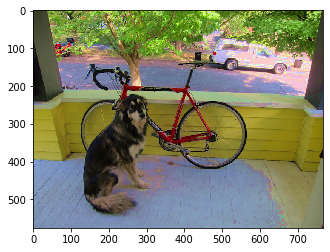

In [25]:
plt.imshow(rgb_saturated)

In [26]:
save_image(rgb_saturated, 'saturated_dog.jpg')

Image saved as saturated_dog.jpg


In [27]:
sat_dog = load_image_as_np_array('saturated_dog.jpg')

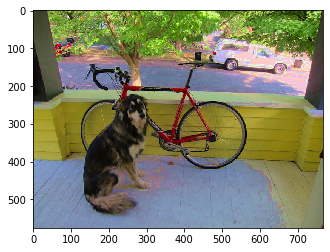

In [28]:
plt.imshow(sat_dog)

In [29]:
def scale_img(img, channel, shifting_factor):
    '''image expects to have 3 channels'''
    
    img_copy = copy.deepcopy(img)
#     print(img_copy,'img')
    img_copy[:,:,channel]  *= shifting_factor
#     print(img_copy,'img')
    img_copy = np.where(img_copy>1 , 1, img_copy)
    img_copy = np.where(img_copy<0 , 0, img_copy)
    return img_copy

In [30]:
img = load_image_as_np_array('/Users/Kunal/Downloads/dog_sample.jpg')
hsv_img = rgb_to_hsv(img)
dog_scale_saturated = scale_img(hsv_img, 1, 2)
dog_scale_saturated = hsv_to_rgb(dog_scale_saturated)
save_image(dog_scale_saturated, 'dog_scale_saturated.jpg')

/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Image saved as dog_scale_saturated.jpg


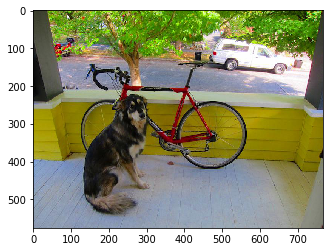

In [31]:
dog_scale_saturated = load_image_as_np_array('dog_scale_saturated.jpg')
plt.imshow(dog_scale_saturated)

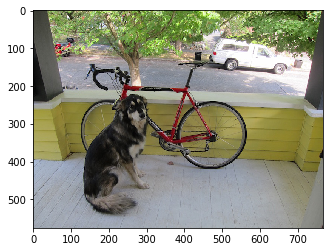

In [32]:
plt.imshow(img)

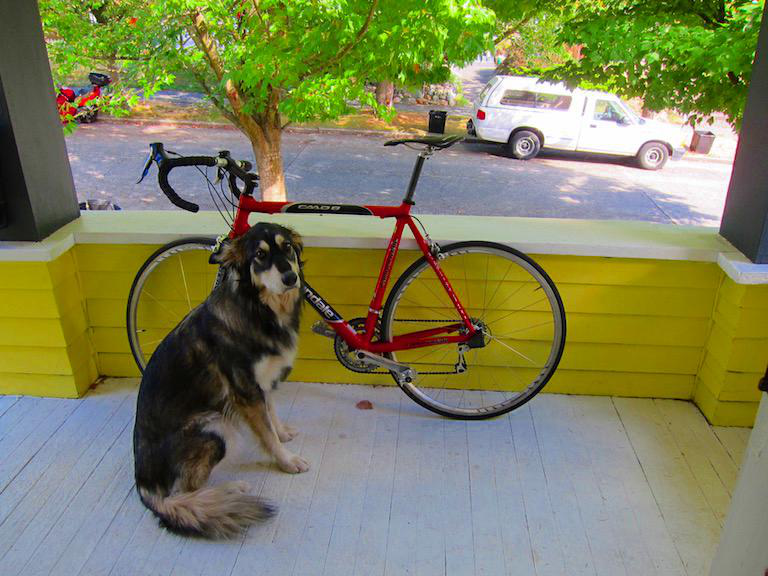

In [33]:
Image.open('dog_scale_saturated.jpg')

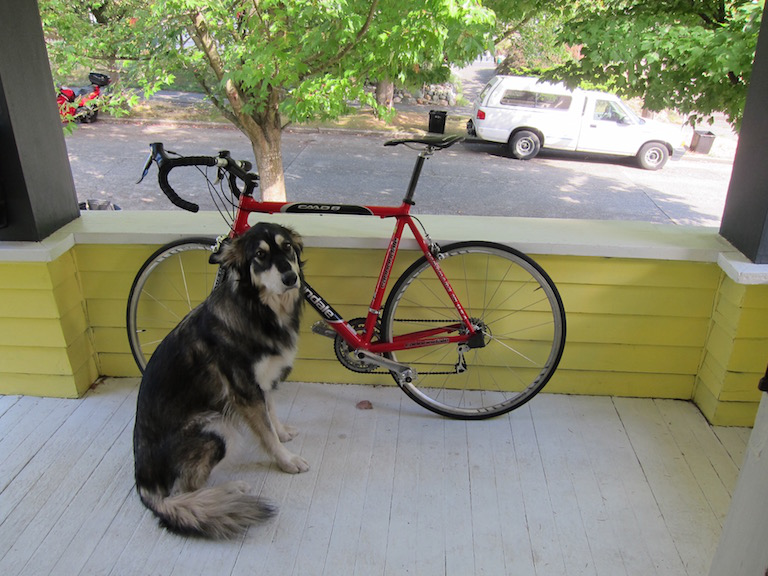

In [34]:
Image.open('/Users/Kunal/Downloads/dog_sample.jpg')

In [35]:
img = load_image_as_np_array('/Users/Kunal/Downloads/dog_sample.jpg')
hsv_img = rgb_to_hsv(img)
dog_scale_saturated = scale_img(hsv_img, 2, 1.4)
dog_scale_saturated = hsv_to_rgb(dog_scale_saturated)
save_image((dog_scale_saturated*255).astype(np.uint8), 'dog_scale_value.jpg')

/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Image saved as dog_scale_value.jpg


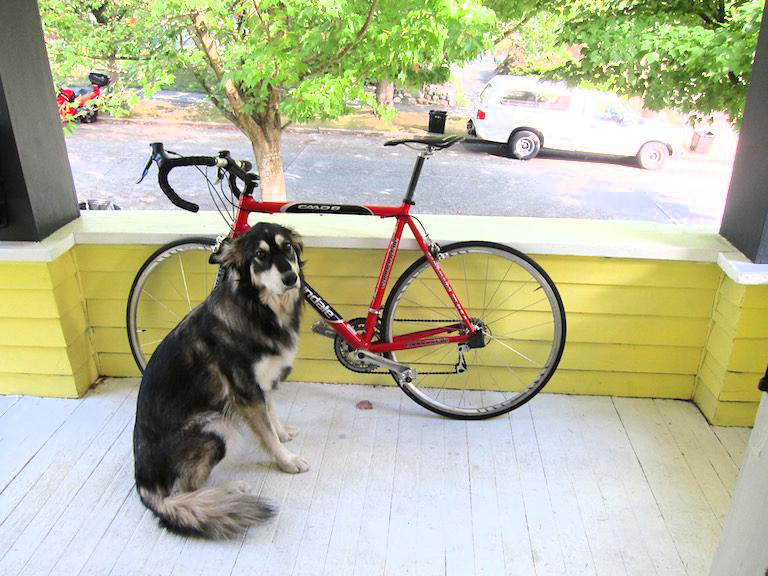

In [36]:
Image.open('dog_scale_value.jpg')